# Problem #2 Mitochondrial SNP/Mutations Patterns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import warnings
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from missingpy import KNNImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

In [4]:
mitochondria = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")

In [5]:
mitochondria.head()

,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,Position_site,3.0,10,16,18,26,35,40,41,47,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,CNSS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,RSRS,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,H,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,T,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [6]:
mitochondria.shape

(1077, 2712)

# Preprocessing

There are a lot of NaN's in this dataset so we need to deal with them before we can do any cluster analysis. In order to deal with these missing values I'm going to call on  "Dealing with missing values in large-scale studies: microarray data imputation and beyond" to determine how to proceed. Article can be viewed at https://academic.oup.com/bib/article/11/2/253/216449. Based on the information I determined that using KNN imputation would be adequate for our purposes.

In [7]:
Y_mitochondria = mitochondria[u'Group']
X_mitochondria = mitochondria.drop(u'Group', axis=1)

In [8]:
X_mitochondria.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
0,3.0,10,16,18,26,35,40,41,47,57,...,16482,16483,16497,16509,16512,16524,16525,16526,16527,16537.0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [9]:
X_mitochondria.isna().sum().sum() #determines total number of missing values

601

In [10]:
#Uses KNN as imputation method
imputer = KNNImputer(n_neighbors=1)
X_imputed = imputer.fit_transform(X_mitochondria)
X_imputed = pd.DataFrame(X_imputed) #transforms X_imputed from array to pandas dataframe
X_imputed.columns = X_mitochondria.columns  #sets column index appropriately 

In [11]:
X_imputed.isna().sum().sum() #determines total number of missing values after imputation

0

In [12]:
X_mitochondria = X_imputed #renames our imputed dataset

In [13]:
X_mitochondria = X_mitochondria.drop([0,1,2]) #drops unnessesarry 

In [14]:
X_mitochondria.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X2702,X2703,X2704,X2705,X2706,X2707,X2708,X2709,X2710,X2711
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
apriori(X_mitochondria, min_support=0.25, use_colnames=True)

,support,itemsets
0,0.270019,(X33)
1,0.403166,(X1278)
2,0.406890,(X1447)
3,0.480447,(X1586)
4,0.406890,(X1647)
5,0.465549,(X1919)
6,0.344507,(X2384)
7,0.469274,(X2605)
8,0.402235,"(X1447, X1278)"
9,0.398510,"(X1586, X1278)"


Below is some code showing linkage of our dataset based off of different criterion. 

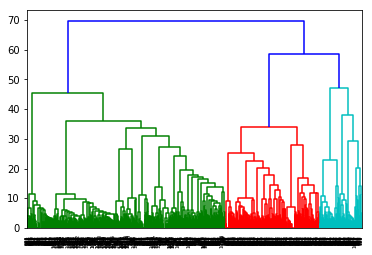

In [130]:
Z = linkage(X_mitochondria, 'ward')
dn = dendrogram(Z)

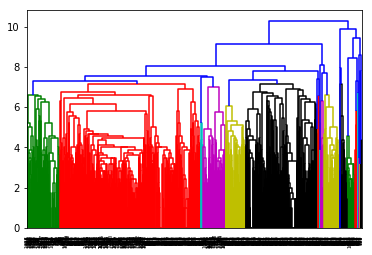

In [133]:
Z = linkage(X_mitochondria, 'complete')
dn = dendrogram(Z)

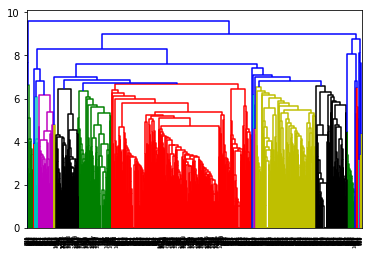

In [135]:
Z = linkage(X_mitochondria, 'weighted')
dn = dendrogram(Z)

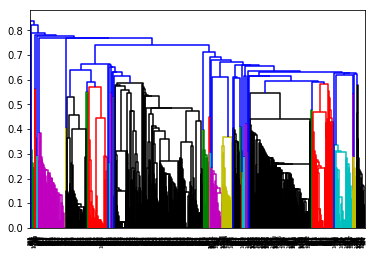

In [137]:
Z = linkage(X_mitochondria, 'single',metric="cosine")
dn = dendrogram(Z)

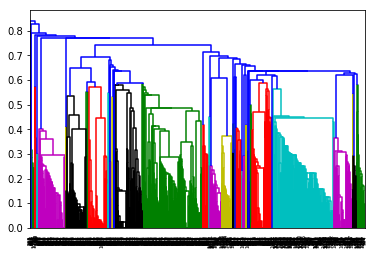

In [139]:
Z = linkage(X_mitochondria, 'single', metric ="braycurtis")
dn = dendrogram(Z)

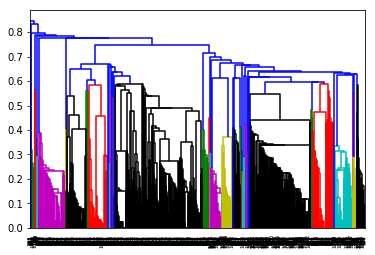

In [141]:
Z = linkage(X_mitochondria, 'single', metric ="correlation")
dn = dendrogram(Z)

# Partitioning the Dataset

In [16]:
Y_mitochondria = Y_mitochondria.drop([0,1,2]) #drops unnessesarry

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_mitochondria, Y_mitochondria,
                                                random_state=9)
Xcolnames = list(X_mitochondria)

In [18]:
scaler = StandardScaler()
scaler.fit(X_mitochondria)
X_scaled = scaler.transform(X_mitochondria)

# Principle Component Analysis

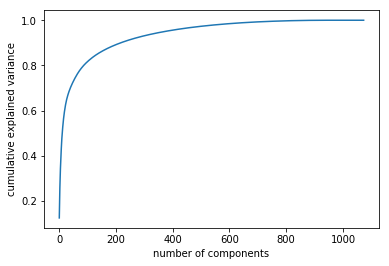

In [19]:
pca = PCA().fit(X_mitochondria)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Based on the above graph it appears that the first 200 principle components describes roughly 90% of the variance. We will use the first 200 principle components to speed up the computations

In [21]:
pca = PCA(n_components=200)
pca.fit(X_mitochondria)
X_mitochondria_200PCA = pca.transform(X_mitochondria)

# Using BIC and AIC criterion to determine optimal number of clusters

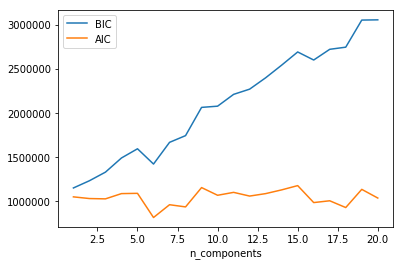

In [25]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_mitochondria_200PCA)
          for n in n_components]

plt.plot(n_components, [m.bic(X_mitochondria_200PCA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_mitochondria_200PCA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

n_components hits is the lowest point at number of components equal to 6 using AIC criterion

# Elbow method to determine optimal number of clusters

In [26]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_mitochondria)
    kmeanModel.fit(X_mitochondria)
    distortions.append(sum(np.min(cdist(X_mitochondria, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_mitochondria.shape[0])

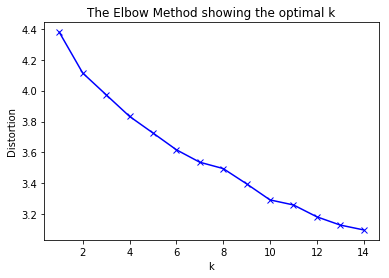

In [27]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the Elbow method it looks like the optimal number of clusters is 10

# Clustering

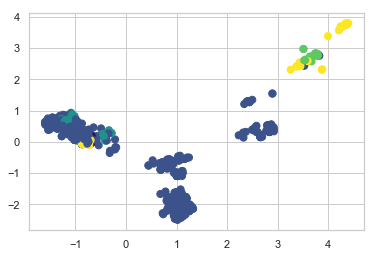

In [71]:
#Clustering with 200 PC's using Spectral Clustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_mitochondria_200PCA)
plt.scatter(X_mitochondria_200PCA[:, 0], X_mitochondria_200PCA[:, 1], c=labels,
            s=50, cmap='viridis');

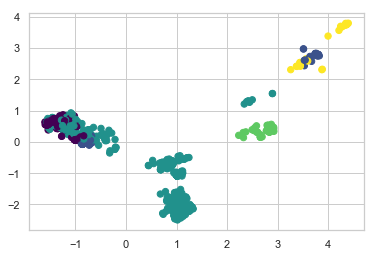

In [111]:
#Clustering with 200 PC's using Gaussian Mixture Modeling 
gmm = GMM(n_components=5).fit(X_mitochondria_200PCA)
labels = gmm.predict(X_mitochondria_200PCA)
plt.scatter(X_mitochondria_200PCA[:, 0], X_mitochondria_200PCA[:, 1], c=labels, s=40, cmap='viridis');

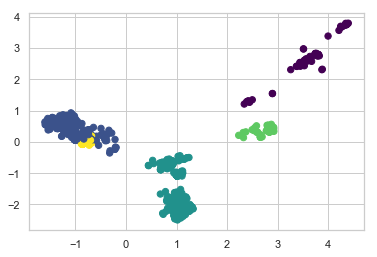

In [102]:
#Clustering with 200 PC's using Agglomerative Clustering: Recursively merges
#pair of clusters that minimally increases a given linkage distance
clustering = AgglomerativeClustering(n_clusters=5).fit(X_mitochondria_200PCA)
labels = clustering.labels_
plt.scatter(X_mitochondria_200PCA[:, 0], X_mitochondria_200PCA[:, 1], c=labels, s=40, cmap='viridis')

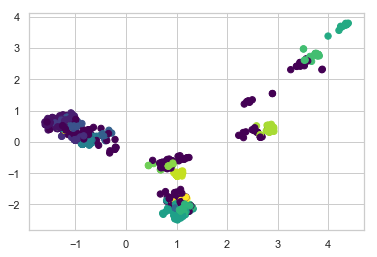

In [93]:
#Clustering with 200 PC's using DBSCAN
db = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(X_mitochondria_200PCA)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(X_mitochondria_200PCA[:, 0], X_mitochondria_200PCA[:, 1], c=labels, s=40, cmap='viridis')

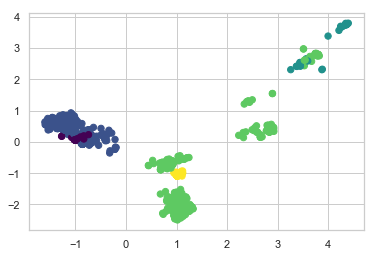

In [84]:
#Clustering with 200 PC's using MiniBatchKmeans
clustering = MiniBatchKMeans(n_clusters=5).fit(X_mitochondria_200PCA)
labels = clustering.labels_
plt.scatter(X_mitochondria_200PCA[:, 0], X_mitochondria_200PCA[:, 1], c=labels, s=40, cmap='viridis')

# Comparing Labels from clustering to defined haplogroups

In [112]:
labels = pd.DataFrame(labels)
labels.columns = ['groupnum']

In [113]:
Y_mitochondria = pd.DataFrame(Y_mitochondria)

In [114]:
bytypes = pd.merge(Y_mitochondria, labels, left_index=True, right_index=True)
bytypes.head()

,Group,groupnum
3,H,2
4,T,0
5,H,0
6,X,0
7,J,0


In [115]:
haplo = bytypes.Group.unique()
clusts = bytypes.groupnum.unique()

In [116]:
first = []
second = []
third = []

for x in haplo :
    x=x
    for j in clusts :
        j=j
        a = bytypes[bytypes["groupnum"]== j]
        b = a[a['Group'] == x].count()['Group']
        
        first.append({x})
        second.append({j})
        third.append({b})

In [117]:
first = pd.DataFrame(first)
first.columns = ['Haplotype']
second = pd.DataFrame(second)
second.columns = ['Cluster']
third = pd.DataFrame(third)
third.columns = ['Count']

df2 = pd.merge(first, second, left_index=True, right_index=True)
df2 = pd.merge(df2, third, left_index=True, right_index=True)
df2 = df2.sort_values(by = 'Count', ascending= False)

In [118]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)

,Haplotype,Cluster,Count
1,H,0,119
70,D,2,72
0,H,2,52
21,U,0,51
55,B,2,49
50,M,2,42
90,A,2,38
125,L2,2,36
20,U,2,29
130,L3,2,27


The table above shows the count of what cluster the mini-batch k-means algorithm sorted a particular observation into as well as the haplogroup in which it was a part of.

If you are curious as to how different clustering methods would affect the table above and the graph below simply run the cell of the clustering method you want to see and then run the code from the "Comparing Labels from clustering to defined haplogroups" to the end of the notebook.

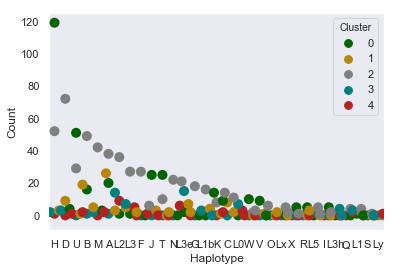

In [126]:
sns.set(style="dark", palette="deep")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Haplotype", y=r"Count", hue="Cluster",
              palette=["darkgreen", "darkgoldenrod", "gray","teal","firebrick"], data=df2, size =10)